In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import ants
import numpy as np

In [7]:
moving = ants.image_read('/home/jovyan/work/3_standardfull.nii.gz')
fixed = ants.image_read('/home/jovyan/work/3_standardfull2.nii.gz')

moving = ants.resample_image(moving, (64,64,64), 1, 0)
fixed = ants.resample_image(fixed, (64,64,64), 1, 0)
print("moving size:" + str(moving.shape) + "fixed size:" + str(fixed.shape))

moving size:(64, 64, 64)fixed size:(64, 64, 64)


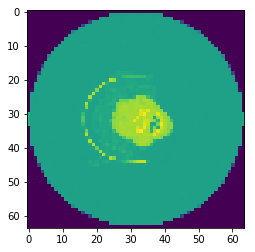

In [8]:
plt.imshow(fixed[:,:,17])

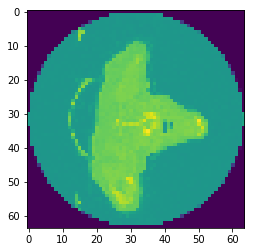

In [10]:
plt.imshow(moving[:,:,17])

{'warpedmovout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (7.921, 7.921, 4.6714)
	 Origin     : (-250.0, 249.0232, -347.8)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'warpedfixout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (7.921, 7.921, 4.6714)
	 Origin     : (-250.0, 249.0232, -278.3)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'fwdtransforms': ['/tmp/tmps3wr8eki0GenericAffine.mat'], 'invtransforms': ['/tmp/tmps3wr8eki0GenericAffine.mat']}


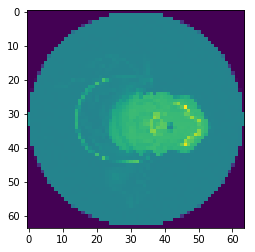

In [15]:
mytx = ants.registration(fixed=fixed , moving=moving, type_of_transform='Translation' )
print(mytx)
warped_moving = mytx['warpedmovout']
plt.imshow(warped_moving[:,:,17])

{'warpedmovout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (7.921, 7.921, 4.6714)
	 Origin     : (-250.0, 249.0232, -347.8)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'warpedfixout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (7.921, 7.921, 4.6714)
	 Origin     : (-250.0, 249.0232, -347.8)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'fwdtransforms': ['/tmp/tmpy25ndmpa1Warp.nii.gz', '/tmp/tmpy25ndmpa0GenericAffine.mat'], 'invtransforms': ['/tmp/tmpy25ndmpa0GenericAffine.mat', '/tmp/tmpy25ndmpa1InverseWarp.nii.gz']}


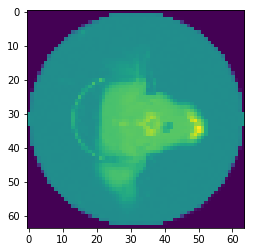

In [16]:
mytx = ants.registration(fixed=fixed , moving=warped_moving, type_of_transform='SyN' )
print(mytx)
warped_moving = mytx['warpedmovout']
plt.imshow(warped_moving[:,:,17])